In [1]:
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-6yeh1e56
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-6yeh1e56
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0.dev0-py3-none-any.whl size=179812 sha256=ca8cfaab4b80eb6c1e454ade13aeae60bf6e2779a662ae05d2982d111ea9412f
  Stored in directory: /tmp/pip-ephem-wheel-cache-g9a89zr3/wheels/cc/c4/d8/5341e93b6376c5c929c49469fce21155eb69cef1a4da4ce32c
Successfully built tensorflow-docs


In [2]:
import numpy as np 
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import imshow

In [4]:
X = np.load('../content/images28_28.npy')
y = np.load('../content/labels28_28.npy')

In [5]:
tain_size=0.7
valid_size = 0.1
test_size = 0.2
valid_test_split = valid_size / test_size

X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=1-tain_size, shuffle=True, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test_val, y_test_val, test_size=valid_test_split, shuffle=True, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_val.shape, y_val.shape)

(7010, 28, 28, 3) (7010, 7)
(1503, 28, 28, 3) (1503, 7)
(1502, 28, 28, 3) (1502, 7)


In [6]:
def get_callbacks():
  return [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=200)      
  ]

In [7]:
histories = {}

In [8]:
l2_cnn_model = tf.keras.Sequential([                                                               
   keras.layers.Conv2D(28, (3, 3), activation = 'relu', input_shape=(28, 28, 3),
                       kernel_regularizer=regularizers.l2(0.001)),
   keras.layers.MaxPooling2D(2, 2),
   keras.layers.Conv2D(56, (3, 3), activation = 'relu',
                       kernel_regularizer=regularizers.l2(0.001)),
   keras.layers.MaxPooling2D(2, 2),
   keras.layers.Conv2D(56, (3, 3), activation = 'relu',
                       kernel_regularizer=regularizers.l2(0.001)),
   keras.layers.Flatten(),
   keras.layers.Dense(56, activation='relu',
                      kernel_regularizer=regularizers.l2(0.001)),
   keras.layers.Dense(7, activation='softmax')                                 
])
l2_cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
l2_cnn_hist = l2_cnn_model.fit(X_train, y_train, epochs=40, validation_data=(X_val, y_val), callbacks=get_callbacks(), verbose=0)

In [10]:
histories['l2_cnn'] = l2_cnn_hist

In [17]:
print(l2_cnn_hist.history['val_accuracy'])

[0.661784291267395, 0.6744340658187866, 0.6824234127998352, 0.6471371650695801, 0.6830891966819763, 0.7017310261726379, 0.7097203731536865, 0.6990678906440735, 0.7190412878990173, 0.7190412878990173, 0.7143808007240295, 0.717043936252594, 0.6990678906440735, 0.7210386395454407, 0.7230359315872192, 0.6997336745262146, 0.7103861570358276, 0.7190412878990173, 0.7190412878990173, 0.7117177248001099, 0.7130492925643921, 0.7137150168418884, 0.7143808007240295, 0.7103861570358276, 0.7237017154693604, 0.7083888053894043, 0.7190412878990173, 0.7163781523704529, 0.6970705986022949, 0.7070572376251221, 0.7017310261726379, 0.6984021067619324, 0.7237017154693604, 0.7237017154693604, 0.7077230215072632, 0.7103861570358276, 0.7103861570358276, 0.7110519409179688, 0.7097203731536865, 0.6950732469558716]


(0.0, 1.0)

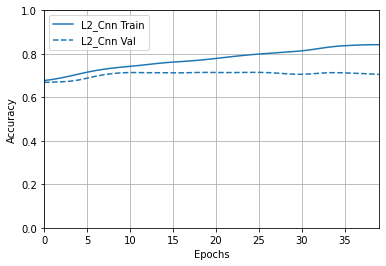

In [19]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'accuracy', smoothing_std=10)
plotter.plot(histories)
plt.ylim([0, 1])